In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


ANALIZAMOS LAS VARIABLES CATEGORICAS

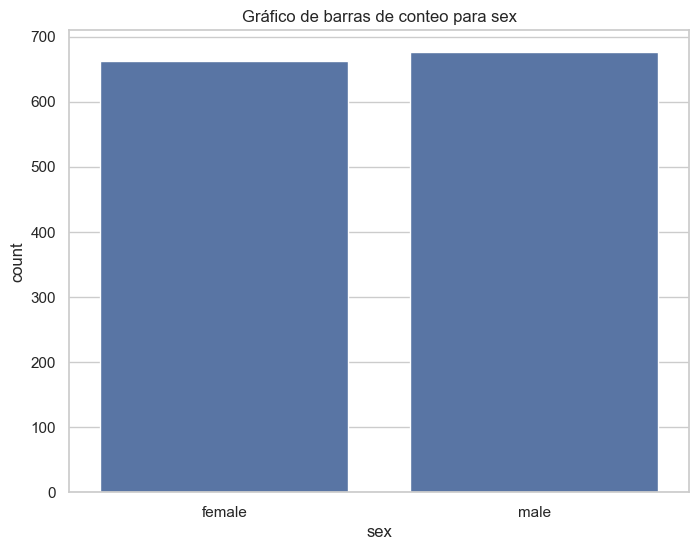

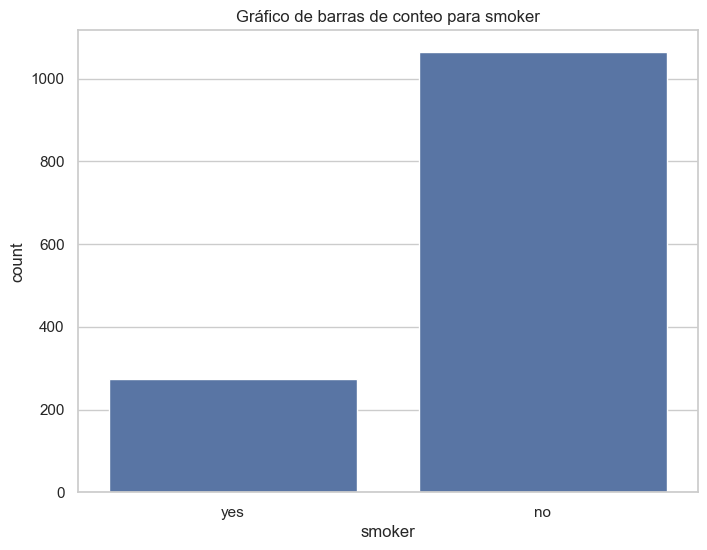

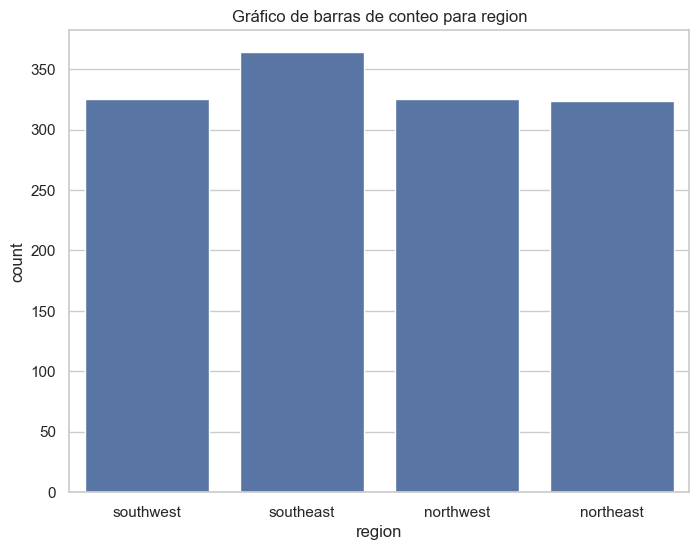

In [36]:
# Seleccionamos las variables categoricas y graficamos con barras de conteo 
variables_cat = ['sex', 'smoker', 'region']
variables_num = ['age', 'bmi', 'children', 'charges']

# Defenir una paleta de colores
paleta_colores = sns.color_palette("bright")

# Crear un gráfico de barras de conteo para cada variable categórica
for var in variables_cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Gráfico de barras de conteo para {var}')
    plt.show()

Observaciones
-------------

- Sex: No hay una gran diferencia en el género.
- Smoker: Vemos que la gran mayoría no fuma 
- Region: Solo hay una pequeña diferencia en la región Southeast 


In [37]:
# podemmos extraer algunas variables estadísticas descriptivas basicas 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
# Seleccionar las filas mean, min y max utilizando loc[]
stats = df.describe().loc[['mean', 'min', 'max']]

# Mostrar las estadísticas seleccionadas
print(stats)

            age        bmi  children       charges
mean  39.207025  30.663397  1.094918  13270.422265
min   18.000000  15.960000  0.000000   1121.873900
max   64.000000  53.130000  5.000000  63770.428010


El analisis descriptivo sugiere posibles outliers en el Dataset 

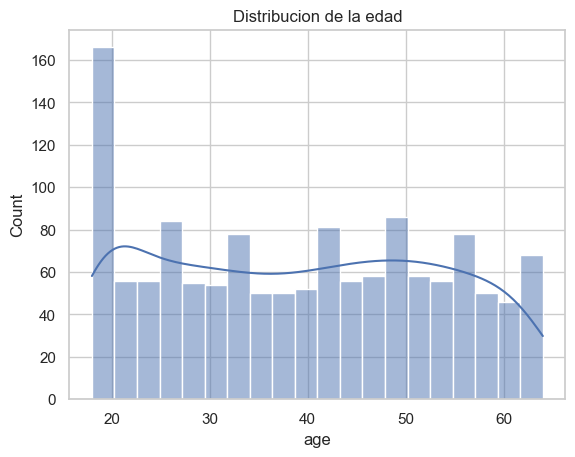

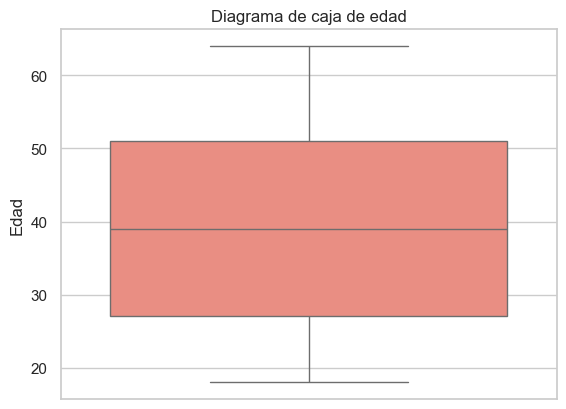

In [55]:
# Graficamos un histograma y un boxplot de la columna Edad
# Histograma 
sns.histplot(data=df , x='age', bins=20, kde=True)
plt.title('Distribucion de la edad')
plt.show()

# Boxplot 
sns.boxplot(data=df, y='age', color='salmon')
plt.title('Diagrama de caja de edad')
plt.ylabel('Edad')
plt.show()


Observación

En el histograma vemos un gran numero de jovenes en los edades de los 20.
El boxplot sin embargo nos muestra una distribución normal de la edad.

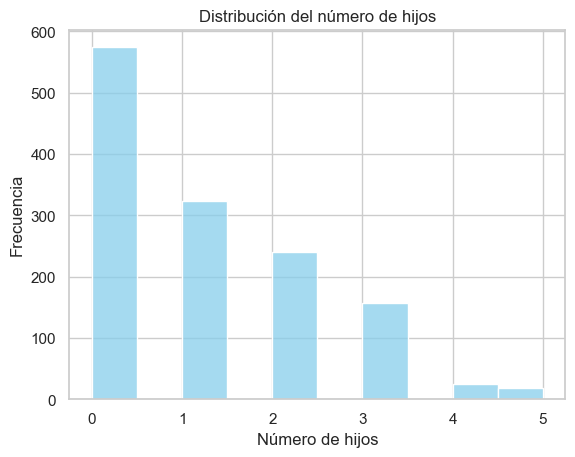

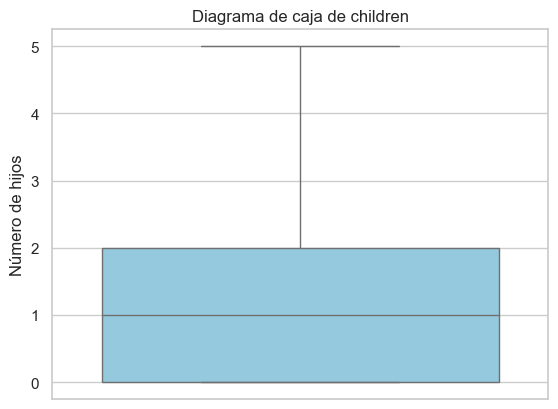

In [53]:
# Graficamos un histograma y un boxplot de la columna Hijos 
# Histograma
sns.histplot(data=df, x='children', bins=10, kde=False, color='skyblue')
plt.title('Distribución del número de hijos')
plt.xlabel('Número de hijos')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
sns.boxplot(data=df, y='children', color='skyblue')
plt.title('Diagrama de caja de children')
plt.ylabel('Número de hijos')
plt.show()

OBSERVACION 

Notable diferencia en la frequencia de No hijos, en el diagrama de caja observamos entre 0 y 2 hijos.



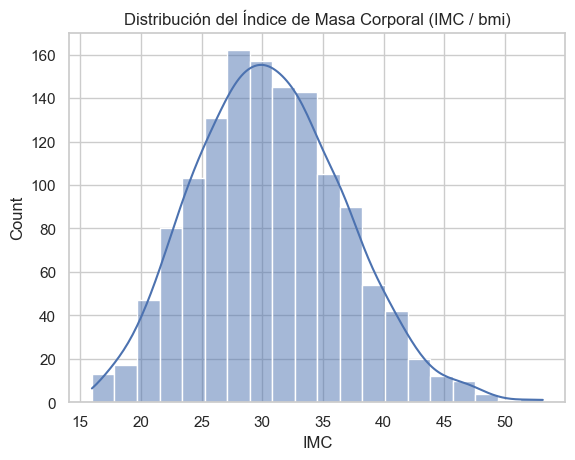

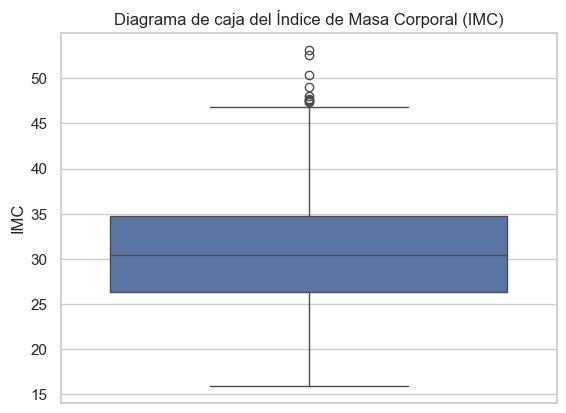

In [56]:
# Graficamos un histograma y un boxplot de la columna BMI  
# Histograma
sns.histplot(data=df, x='bmi', bins=20, kde=True)
plt.title('Distribución del Índice de Masa Corporal (IMC / bmi)')
plt.xlabel('IMC')
plt.show()

# Boxplot 
sns.boxplot(data=df, y='bmi')
plt.title('Diagrama de caja del Índice de Masa Corporal (IMC)')
plt.ylabel('IMC')
plt.show()

Observaciones 

-Grafica de histogramas: Distribución normal, con una leve tendencia alcista.
-Boxplot: Vemos outliers o valores atípicos en la parte superior.

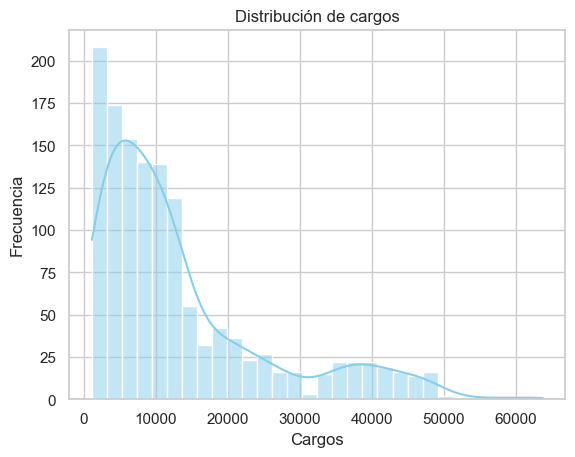

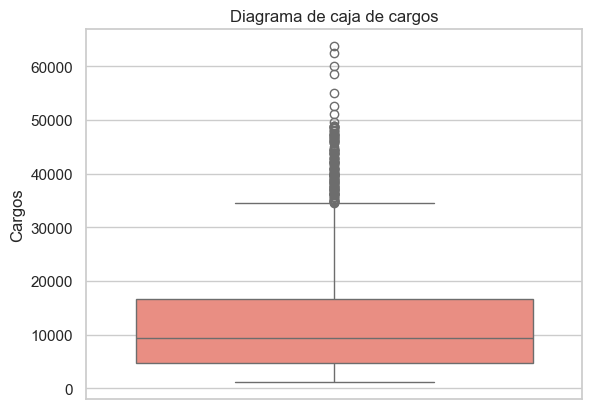

In [57]:
# Graficamos un histograma y un boxplot de la columna Hijos 
# Histograma
sns.histplot(data=df, x='charges', bins=30, kde=True, color='skyblue')
plt.title('Distribución de cargos')
plt.xlabel('Cargos')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
sns.boxplot(data=df, y='charges', color='salmon')
plt.title('Diagrama de caja de cargos')
plt.ylabel('Cargos')
plt.show()

OBSERVACIONES

En el histograma vemos que la mayoria tiene una prima se seguro entre 0 y 10000.
En el Diagrama de cajas se ve claramente los outliers por encima de los 35000.

In [59]:
# Imputamos valores atipicos en la columna de (Charges)
# Calcular la mediana de la columna "charges"
median_charges = df['charges'].median()

# Calcular el tercer cuartil (Q3)
q3 = df['charges'].quantile(0.75)

# Identificar los valores atípicos en la columna "charges".
outliers = df[df['charges'] > q3]

# Imputar los valores atípicos con la mediana
df.loc[df['charges'] > q3, 'charges'] = median_charges

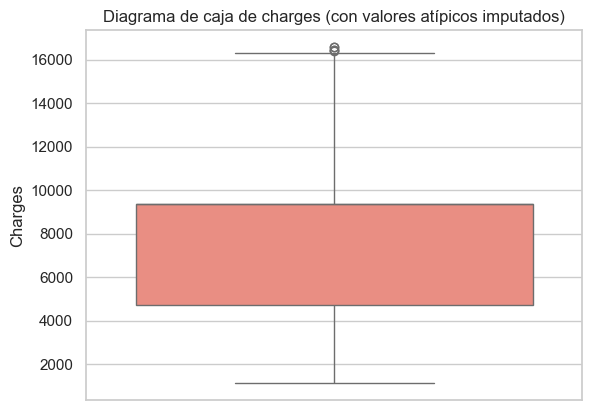

In [60]:
# Generamos un nuevo Boxplot 
sns.boxplot(data=df, y='charges', color='salmon')
plt.title('Diagrama de caja de charges (con valores atípicos imputados)')
plt.ylabel('Charges')
plt.show()

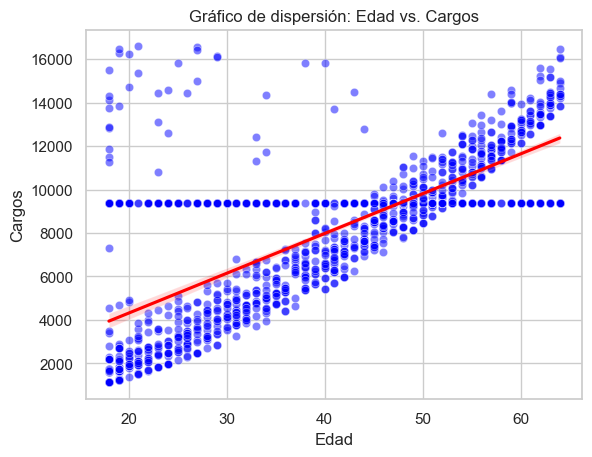

In [61]:
# Realizamos un analisis Bivariado con una grafica de dispersión entre las variables edad y cargos
# Elegimos las variables
x = df['age']
y = df['charges']

# Crear la gráfica de dispersión
sns.scatterplot(x=x, y=y, alpha=0.5, color='blue')

# Agregar una línea de regresión(Opcional)
sns.regplot(x=x, y=y, scatter=False, color='red')

# Personalizar la gráfica
plt.title('Gráfico de dispersión: Edad vs. Cargos')
plt.xlabel('age')
plt.ylabel('Cargos')
plt.grid(True)
plt.show()

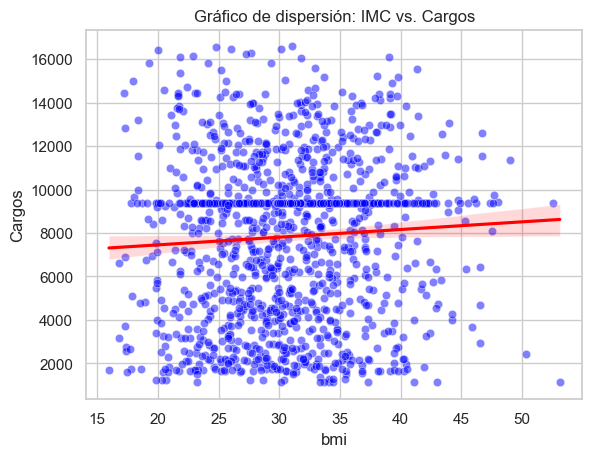

In [63]:
# Realizamos un analisis Bivariado con una grafica de dispersión entre las variables IMC y cargos
# Elegimos las variables
x = df['bmi']
y = df['charges']

# Crear la gráfica de dispersión
sns.scatterplot(x=x, y=y, alpha=0.5, color='blue')

# Agregar una línea de regresión(Opcional)
sns.regplot(x=x, y=y, scatter=False, color='red')

# Personalizar la gráfica
plt.title('Gráfico de dispersión: IMC vs. Cargos')
plt.xlabel('bmi')
plt.ylabel('Cargos')
plt.grid(True)
plt.show()

In [66]:
# Codificación de variables Categoricas 
# Utilizamos la técnica de one-hot encoding para codificarlas 
variables_cat = ['sex', 'smoker', 'region']

data_encoded = pd.get_dummies(df, columns=variables_cat)
print(data_encoded.columns)

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [70]:
# Escalado de datos, normalización (Min-Max Scaling)
# Inicializar el objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar los datos codificados
data_scaled = scaler.fit_transform(data_encoded)

# Convertir los datos normalizados de nuevo a un DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)

# Verificar el DataFrame normalizado
print(data_scaled_df.head())

        age       bmi  children   charges  sex_female  sex_male  smoker_no  \
0  0.021739  0.321227       0.0  0.534133         1.0       0.0        0.0   
1  0.000000  0.479150       0.2  0.039036         0.0       1.0        1.0   
2  0.217391  0.458434       0.6  0.215174         0.0       1.0        1.0   
3  0.326087  0.181464       0.0  0.534133         0.0       1.0        1.0   
4  0.304348  0.347592       0.0  0.177501         0.0       1.0        1.0   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0         1.0               0.0               0.0               0.0   
1         0.0               0.0               0.0               1.0   
2         0.0               0.0               0.0               1.0   
3         0.0               0.0               1.0               0.0   
4         0.0               0.0               1.0               0.0   

   region_southwest  
0               1.0  
1               0.0  
2               0.0  
3               

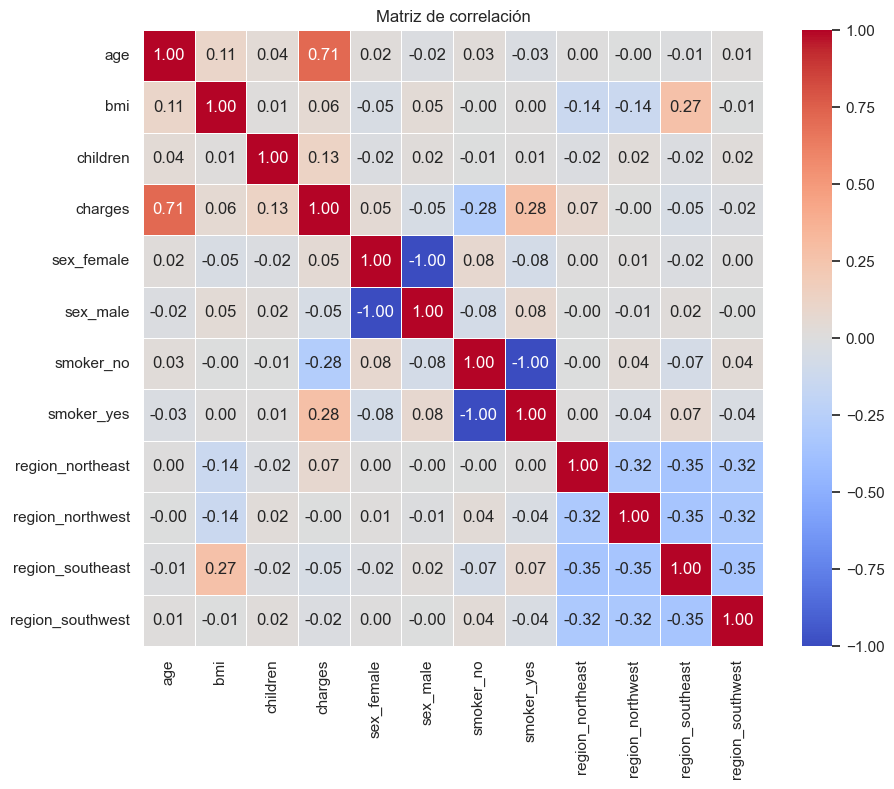

In [71]:
# Creamos el Heatmap, matriz de correlación 
# Calcular la matriz de correlación
correlation_matrix = data_scaled_df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [74]:
# Implementamos el model de regrsión lineal
# Dividimos los datos predictoras y a predecir

df_model = data_scaled_df

# Dividir los datos en características (X) y variable objetivo (y)
X = df_model.drop(columns=['charges'])
y = df_model['charges']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



In [77]:
# Obtener un resumen detallado del modelo de regresión lineal con la biblioteca Statsmodels
# Añadir una constante al conjunto de características 
X_train_const = sm.add_constant(X_train)

# Inicializar y ajustar el modelo de regresión lineal con statsmodels
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          8.32e-204
Time:                        22:47:59   Log-Likelihood:                 527.39
No. Observations:                1070   AIC:                            -1037.
Df Residuals:                    1061   BIC:                            -992.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0988      0.006  

In [79]:
residuos = results.resid

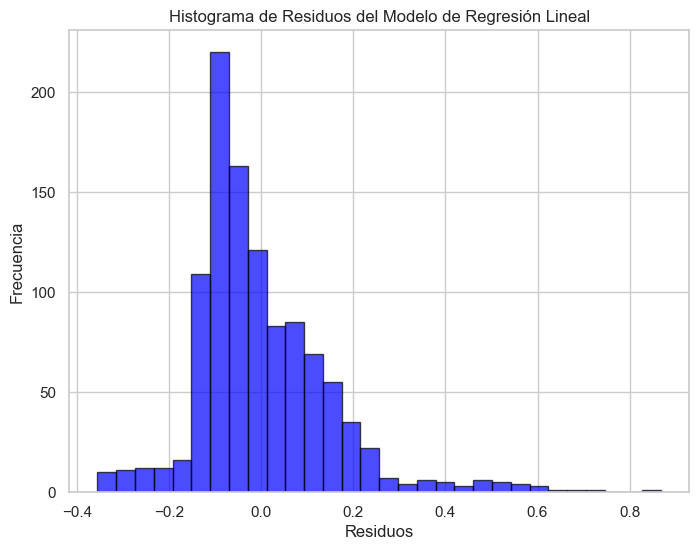

In [80]:
# Trazar el histograma de los residuos
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos del Modelo de Regresión Lineal')
plt.grid(True)
plt.show()